In [ ]:
#Description: This program predicts the price of Bitcoin for the next 30 days

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
#Store the data into the variable df
df = pd.read_csv('BTC-USD.csv')
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0


In [ ]:
#Remove all other columns, so when you shift up by 30, there are no NA fields left
df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Date'], 1, inplace=True)

In [ ]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-prediction_days)

In [ ]:
#Show the first 7 rows of the new data set
df.head(7)

,Close,Prediction
0,457.334015,383.757996
1,424.440002,391.441986
2,394.795990,389.545990
3,408.903992,382.845001
4,398.821014,386.475006
5,402.152008,383.157990
6,435.790985,358.416992


To demonstrate what we accomplished above by shifting the values up 30 days, the last 30 rows don’t have any values. We will show this by printing the last 7 rows of the new data set.

In [ ]:
#Show the last 7 rows of the new data set
df.tail(7)

,Close,Prediction
2426,58232.316406,NaN
2427,55859.796875,NaN
2428,56704.574219,NaN
2429,49150.535156,NaN
2430,49716.191406,NaN
2431,49880.535156,NaN
2432,47702.500000,NaN


Create the independent data set. This is the set that contains the features to make the future predictions with. First we will convert the dataframe to a numpy array and drop the prediction column, then we will remove the last ’n’ rows where from the data set. In this article that means we will remove the last 30 days since ’n’ = prediction_days , which equals 30.

An independent data set X is created to use for predicting, and last 30 days are removed from it and it serves as our training set.

In [ ]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]
print(X)


#So we observe that by dropping Prediction, only close prices are left and NaN are removed too.

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [63503.457031]
 [63109.695313]
 [63314.011719]]


Create the dependent data set, this will be the data set that contains our target, that’s the data that we are trying to predict. We will accomplish this by converting the dataframe to a numpy array and getting all of the values from the prediction column of the dataframe.
Then we will get all of the values from the created data set except for the last ’n’ rows.

In [ ]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) 
y = np.array(df['Prediction'])  
#Prediction is simply actual values that were observed 30 days ahead in future
#Here for prediction we created prediction by shifting close by -30
# Get all of the y values except the last 'n' rows 
y = y[:-prediction_days] 
print(y)


X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
np.any(np.isnan(X))
np.any(np.isnan(y))


[  383.757996   391.441986   389.54599  ... 49716.191406 49880.535156
 47702.5     ]


False

In [ ]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a variable called prediction_days_array and set it equal to the last 30 rows of the original data set from the price column.

In [ ]:
# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

#These are closing prices for last 30 days it seems
#As in prediction_days_array, we drop prediction, thus keeping only close prices and then slice -30: , ie every value after going 30 from end to front.
#So has last 30 days of closing prices

[[61572.789063]
 [60683.820313]
 [56216.183594]
 [55724.265625]
 [56473.03125 ]
 [53906.089844]
 [51762.273438]
 [51093.652344]
 [50050.867188]
 [49004.253906]
 [54021.753906]
 [55033.117188]
 [54824.703125]
 [53555.109375]
 [57750.175781]
 [57828.050781]
 [56631.078125]
 [57200.292969]
 [53333.539063]
 [57424.007813]
 [56396.515625]
 [57356.402344]
 [58803.777344]
 [58232.316406]
 [55859.796875]
 [56704.574219]
 [49150.535156]
 [49716.191406]
 [49880.535156]
 [47702.5     ]]


Create the Support Vector Regression model using the radial basis function (rbf), and train the model.

In [ ]:
#Reshaping as model was showing error before and needs to have a 2D input
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [ ]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.43084347010406365


In [ ]:
# Print the predicted value
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

#Print the actual values
print(y_test)

[  283.18839966  8746.72430239   235.06918343  4077.00445811
  9303.77508477  8809.47324437  6070.52891851  4018.42095494
  9370.71523991  9244.61983945  6041.74157598   232.90159589
 12509.3255128   4568.56730625   449.76547066  3348.2662648
 15551.44076982   317.7029739   9206.92831801   443.87495987
  4198.01529638  1490.97547829   224.15404      228.276752
   331.55517061   280.47654792  6544.10514176   467.30403591
 13044.08144026 13647.75852803   245.10023827  9397.46626022
   696.39679624  9172.87039985  6140.70732911 15983.7459953
   873.53167625  7237.76541455   254.77583276  9142.78409304
  8869.56859468 10760.13857522 10771.17917402   372.799516
  6136.982233     566.93519106 18817.65933309  4270.44676907
   718.41207152 12349.00520711  2746.00124383 15642.91889242
  2465.63073489 14133.88509693  8927.64397177  9612.30693797
  1651.56046548  6076.22121395  9318.31831992  8770.94903364
   402.28096714   467.45241861   827.85695589  4721.83299806
   393.55609545  9025.9714789 

In [ ]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[12633.35892737 12443.21769164 14896.01778198 14174.32264746
 13165.72952659 12720.54836245 14338.67760392 13232.46092033
 12771.7914957  16029.32986465 13082.62715782 13919.99702148
 14112.07910297 12310.43245394 17584.49765511 17163.34254536
 13154.97630177 14297.27565224 12296.63753282 16473.59207056
 13455.97073985 15777.28554231 17302.17361902 15718.17193714
 15420.33469477 13268.17323907 15090.31653424 14298.82909358
 13578.9186434  14208.3196941 ]


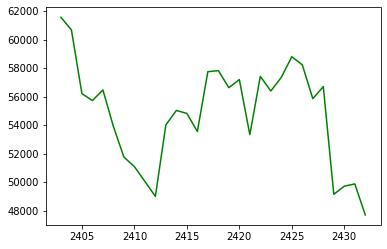

In [ ]:
#Print the actual price for the next 'n' days, n=prediction_days=30 
df.tail(prediction_days)


plt.plot(df.tail(prediction_days), label="Actual Price", color='green')



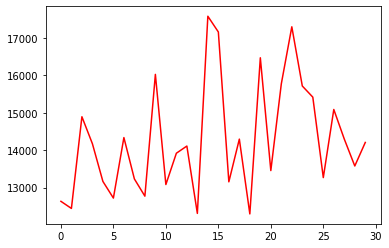

In [ ]:
plt.plot(svm_prediction, label="Predicted Price", color='red')

In [ ]:
error = mean_squared_error(y_test[-30:], svm_prediction)
print(error)

123512737.2113584


In [ ]:
from sklearn.metrics import mean_absolute_error

abc = y_test[-30:] - svm_prediction
abc = abs(abc)
abc = abc[~np.isnan(abc)]
from statistics import mean
abc = mean(abc)
print(abc)
#print(mean_absolute_error) 

10071.9434048466


In [ ]:
##R^2 calculated above

TypeError: ignored